In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt 


In [3]:
# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
sys.path.append('/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/pkh-code/fitting')
import analyzeGotran as ao

reads pickles generated by the following line:

<code> python daisychain.py -t 0.1 -jit -odeName p2x4_MG.ode -var CNt_NFAT 0.15 -var stim_amplitude 100 -T 10000 -iters 1 -name atp100_NFAT0p15.pickle </code>


In [10]:
data0 = ao.readPickle("/home/AD/bch265/Data_storage/p2x4_fitted_100uM_cat.pickle")
data1 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_fitted_100uM_cat.pickle")
data2 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_fitted_320uM_cat.pickle")
data3 = ao.readPickle("/home/AD/bch265/Data_storage/p2x7_fitted_1000uM_cat.pickle")


Reading /home/AD/bch265/Data_storage/p2x4_fitted_100uM_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_fitted_100uM_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_fitted_320uM_cat.pickle
Reading /home/AD/bch265/Data_storage/p2x7_fitted_1000uM_cat.pickle


In [5]:
data0.keys()
data1.keys()
data2.keys()
data3.keys()


['s_idx', 'p_idx', 'j', 'p', 's', 'j_idx', 't']

In [6]:
# Mackay2016 P2X4 ATP 100 uM st 50
t10 = np.array([9.375,8.8541666667,11.4583333333,18.75,26.5625,30.2083333333,41.6666666667,65.1041666667,
                304.1666666667+6,305.7291666667+6,308.8541666667+6,319.7916666667+6,326.5625+6,361.4583333333+6])
y10 = np.array([0,-2195.1219512195,-902.4390243902,-396.3414634146,-140.243902439,-67.0731707317,-12.1951219512,0,
                0,-530.487804878,-176.8292682927,-54.8780487805,-18.2926829268,0])

# Yan P2X7 HEK ATP st 120s 100 uM
t12 = np.array([0,6.41221374,30.6870229,53.12977099,95.26717557,119.5419847,123.6641221,127.7862595])
y12 = np.array([0,-0.006428571429,-0.01303571429,-0.01428571429,-0.01345238095,-0.01255952381,-0.0008333333333,-0.000119047619])

# Yan P2X7 HEK ATP st 120s 320 uM
t11 = np.array([0,1.832061069,11.45038168,16.48854962,67.78625954,119.0839695,122.7480916,127.7862595])
y11 = np.array([0,-0.03928571429,-0.05142857143,-0.05142857143,-0.04464285714,-0.04107142857,-0.002321428571,-0.00125])

# Yan P2X7 HEK ATP st 120s 1000 uM
t15 = np.array([0,0,7.328244275,25.64885496,32.97709924,53.58778626,79.23664122,94.80916031,107.1755725,118.6259542,120.9160305,122.2900763])
y15 = np.array([0,-0.0505952381,-0.06845238095,-0.08035714286,-0.09523809524,-0.2083333333,-0.5863095238,-0.8392857143,-0.8988095238,-0.9077380952,0.03273809524,0.002976190476])


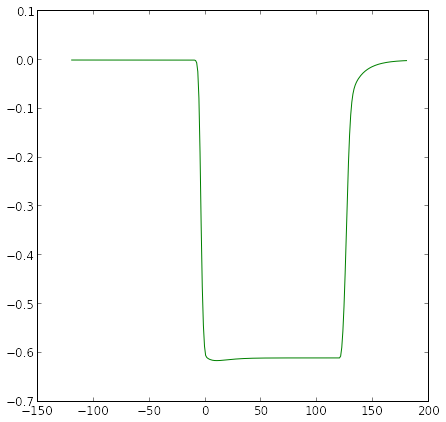

In [11]:
stateLabel2 = "I_ptxs"
subData1 = ao.GetData(data1,stateLabel2)
subData2 = ao.GetData(data2,stateLabel2)
subData3 = ao.GetData(data3,stateLabel2)
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)

ax.tick_params(labelsize=12)

ax.plot(subData3.t*1000-120,subData3.valsIdx,'g-',label="Model - 1.0 mM ATP")

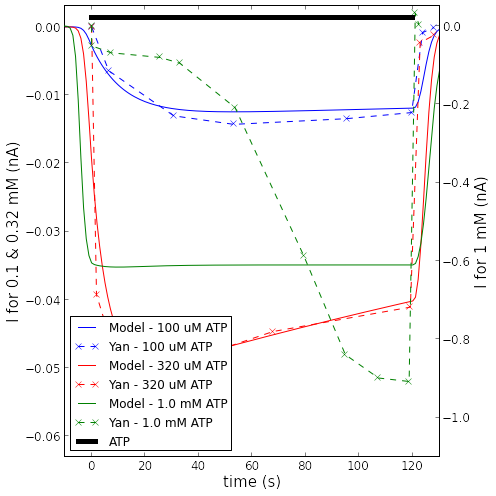

In [17]:
#stateLabel1 = "I_ptxf"
#subData0 = ao.GetData(data0,stateLabel1)
stateLabel2 = "I_ptxs"
subData1 = ao.GetData(data1,stateLabel2)
subData2 = ao.GetData(data2,stateLabel2)
subData3 = ao.GetData(data3,stateLabel2)
# data is stored as
# subData.t - time
# subData.valsIdx - values of 'stateLabel' state

#plt.figure(figsize=(7,7))
#plt.tick_params(labelsize=12)
#plt.plot(subData0.t*1000,subData0.valsIdx,'b-',label="Model - 100 uM ATP")
#plt.plot(t10+30,y10/1000,'r-',label="Mackay - 100 uM ATP")
#plt.plot([40,90],[0.05,0.05],'black',lw=5,label="ATP")
#plt.plot([340,390],[0.05,0.05],'black',lw=5)
#plt.xlabel("time (s)",fontsize=15)
#plt.ylabel("current (nA)",fontsize=15)
#plt.ylim(-2.5,0.2)
#plt.xlim(0,440)
#plt.tight_layout()
#plt.legend(loc=5,fontsize=12)
#plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/p2x4valid.png")

plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot(subData1.t*1000-120,subData1.valsIdx,'b-',label="Model - 100 uM ATP")
lns2 = ax.plot(subData2.t*1000-120,subData2.valsIdx,'r-',label="Model - 320 uM ATP")
lns3 = ax2.plot(subData3.t*1000-120,subData3.valsIdx,'g-',label="Model - 1.0 mM ATP")
lns4 = ax.plot(t12,y12,'b--x',label="Yan - 100 uM ATP")
lns5 = ax.plot(t11,y11,'r--x',label="Yan - 320 uM ATP")
lns6 = ax2.plot(t15,y15,'g--x',label="Yan - 1.0 mM ATP")
lns7 = ax2.plot([0,120],[0.02,0.02],'black',lw=5,label="ATP")
ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("I for 0.1 & 0.32 mM (nA)",fontsize=15)
ax2.set_ylabel("I for 1 mM (nA)",fontsize=15)
ax.set_ylim(-0.063,0.003)
ax2.set_ylim(-1.1,0.05)
ax.set_xlim(-10,130)
ax2.set_xlim(-10,130)
lns = lns1 + lns4 + lns2 + lns5 + lns3 + lns6 + lns7
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=3,fontsize=12) 
plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/p2x7valid.png")

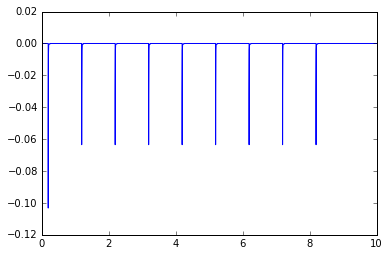

In [18]:
stateLabel = "I_ptxf"
subData = ao.GetData(data,stateLabel)
plt.plot(subData.t,subData.valsIdx)